In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Lets Load the Boston House Pricing Dataset**

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
whole_housing =  fetch_california_housing(as_frame=True)

In [4]:
whole_housing.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
# Lets check the description of the dataset

print(whole_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
print(whole_housing.data)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [7]:
print(whole_housing.target)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


In [8]:
print(whole_housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [9]:
df = whole_housing.frame

In [10]:
housing = df.sample(n=600, random_state=42)

In [11]:
housing.keys()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

**Preparing the Dataset**

In [12]:
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000
...,...,...,...,...,...,...,...,...,...
20493,6.0783,23.0,5.633987,0.866013,934.0,3.052288,34.27,-118.65,2.29200
2305,4.7804,19.0,6.347059,0.994118,1378.0,2.701961,36.83,-119.77,1.01100
9071,2.5278,35.0,5.010000,1.030000,842.0,2.806667,34.71,-118.15,0.97700
4445,1.7463,36.0,3.424490,1.020408,1079.0,4.404082,34.07,-118.22,1.58300


In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 20046 to 1535
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       600 non-null    float64
 1   HouseAge     600 non-null    float64
 2   AveRooms     600 non-null    float64
 3   AveBedrms    600 non-null    float64
 4   Population   600 non-null    float64
 5   AveOccup     600 non-null    float64
 6   Latitude     600 non-null    float64
 7   Longitude    600 non-null    float64
 8   MedHouseVal  600 non-null    float64
dtypes: float64(9)
memory usage: 46.9 KB


In [14]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000


In [15]:
# Check the missing values

housing.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [16]:
#  Exploratory Data Analysis
# Correlation
housing.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.094150,0.472021,-0.037310,0.000656,-0.070151,-0.094380,-0.000399,0.698117
HouseAge,-0.094150,1.000000,-0.170045,-0.104846,-0.360020,0.052068,-0.014150,-0.086369,0.086669
AveRooms,0.472021,-0.170045,1.000000,0.735895,-0.065681,-0.050272,0.164874,-0.074692,0.254467
AveBedrms,-0.037310,-0.104846,0.735895,1.000000,-0.042871,-0.087086,0.136877,-0.024977,-0.014174
Population,0.000656,-0.360020,-0.065681,-0.042871,1.000000,0.100770,-0.086912,0.084767,-0.021122
AveOccup,-0.070151,0.052068,-0.050272,-0.087086,0.100770,1.000000,-0.158875,0.178237,-0.297620
Latitude,-0.094380,-0.014150,0.164874,0.136877,-0.086912,-0.158875,1.000000,-0.916477,-0.139979
Longitude,-0.000399,-0.086369,-0.074692,-0.024977,0.084767,0.178237,-0.916477,1.000000,-0.061718
MedHouseVal,0.698117,0.086669,0.254467,-0.014174,-0.021122,-0.297620,-0.139979,-0.061718,1.000000


In [17]:
# import seaborn as sns
# sns.pairplot(housing)

Text(0, 0.5, 'Price')

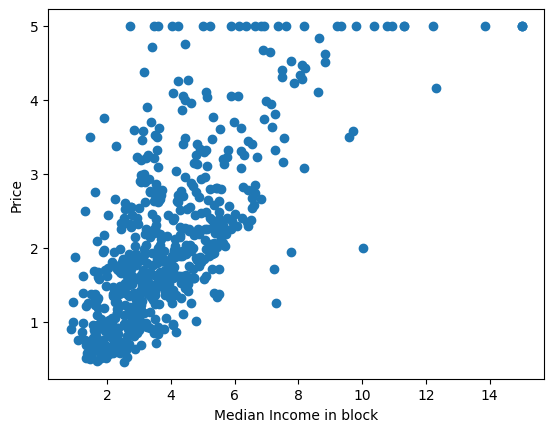

In [18]:
plt.scatter(housing['MedInc'], housing['MedHouseVal'])
plt.xlabel('Median Income in block')
plt.ylabel('Price')

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

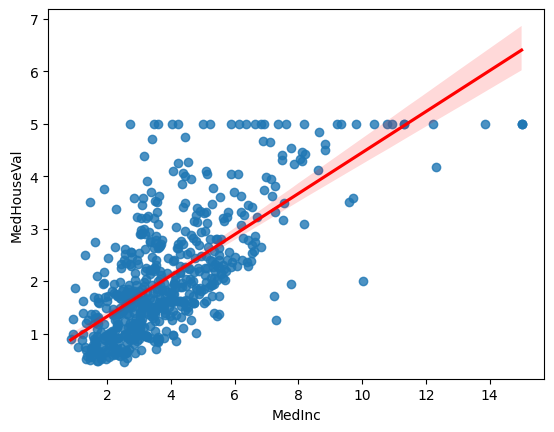

In [19]:
import seaborn as sns
# sns.regplot(x="MedInc", y="MedHouseVal", data= housing)

# TO make it look cleaner

sns.regplot(x="MedInc", y="MedHouseVal", data= housing, line_kws={"color":"red"})


In [20]:
#  Independent and Dependent Features

X = housing.iloc[:, :-1]
y = housing.iloc[:, -1]

In [21]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93


In [22]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


In [23]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17973,3.6292,27.0,4.636058,1.085106,2135.0,2.390817,37.31,-121.95
6887,3.2500,36.0,3.997268,1.008197,1492.0,4.076503,34.06,-118.10
1535,7.5349,33.0,7.002890,0.930636,998.0,2.884393,37.89,-122.04
3335,1.5739,16.0,5.914573,1.206030,519.0,2.608040,38.87,-122.64
18018,5.0863,30.0,5.478405,1.053156,1532.0,2.544850,37.25,-121.95
...,...,...,...,...,...,...,...,...
738,4.7933,37.0,6.000000,1.021544,1635.0,2.935368,37.67,-122.14
4279,1.8576,37.0,2.477564,1.006410,835.0,2.676282,34.09,-118.31
17108,15.0001,32.0,8.845041,1.035124,1318.0,2.723140,37.44,-122.22
119,5.2868,47.0,6.546392,0.936082,1098.0,2.263918,37.84,-122.23


In [24]:
# Standardize the dataset
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
X_test = scaler.transform(X_test)

In [27]:
X_train

array([[-0.15574906, -0.17563599, -0.40058178, ..., -0.75433745,
         0.85740306, -1.25069674],
       [-0.33707349,  0.53290621, -0.70255066, ...,  1.46643548,
        -0.6699972 ,  0.66608442],
       [ 1.71186386,  0.29672548,  0.71826647, ..., -0.10408598,
         1.12998526, -1.29550461],
       ...,
       [ 5.28154509,  0.21799857,  1.58908774, ..., -0.31652501,
         0.91849907, -1.38512036],
       [ 0.63687587,  1.39890224,  0.50247064, ..., -0.92151929,
         1.10648679, -1.39009901],
       [ 0.22478359, -0.2543629 , -0.17033128, ..., -0.91527573,
        -1.23866007,  1.07931256]])

**Model Training**

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
regression = LinearRegression()

In [30]:
regression.fit(X_train, y_train)

LinearRegression()

In [31]:
# Print the coefficients and the intercept

print(regression.coef_)

[ 0.78147116  0.08084832 -0.11383553  0.2446161   0.01617612 -0.22813114
 -1.06500642 -0.99046982]


In [32]:
print(regression.intercept_)

2.091433857142864


In [33]:
# On which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [34]:
# Prediction with test data

reg_pred = regression.predict(X_test)

In [35]:
reg_pred

array([ 1.94948709,  1.65368301,  2.70551392,  2.25171684,  3.30155331,
        2.47757758,  0.94822419,  1.42246183,  2.20941602,  2.42941025,
        1.95668749,  2.5120693 ,  1.05357772,  1.10368486,  2.41270457,
        0.84617669,  1.59610901,  2.58196716,  0.5048927 ,  1.90015761,
        3.02542681,  2.03534237,  1.97851366,  1.7713669 ,  2.77317247,
        0.23503405,  1.02968884,  1.75867867,  1.69108655,  1.28178695,
        2.82456374,  1.92042229,  1.24880611,  1.44009451,  1.29500668,
        0.72717222,  2.74259223,  3.14589677,  1.31737973,  2.02970773,
        2.01297442,  3.26841115,  2.4109268 ,  3.12849825,  2.26955916,
        2.19949979,  0.82852237,  2.29016267,  1.29602241,  1.58931972,
        2.54756131,  2.86652442,  3.82215289,  2.5391785 ,  1.16856611,
        0.43867353,  2.23494217,  3.4024485 ,  2.75764283,  1.05506221,
        3.30052486,  1.2684757 ,  1.54281364,  2.820483  ,  2.78052198,
        0.03043994,  2.81802927,  2.34843721,  1.69661012,  0.91

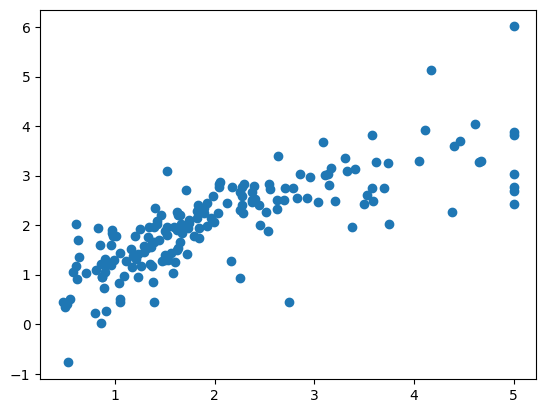

In [36]:
# Plot a scatter plot for the prediction
# Both the values are linear, this indicates that some amount of good information our model has actually given, and is predicting well.
plt.scatter(y_test, reg_pred)

In [37]:
# Prediction with residuals
# residuals >> Error wrt y_test and reg_pred

residuals = y_test - reg_pred
residuals

,MedHouseVal
538,-0.215487
7438,-0.005683
2041,-0.988514
10495,-0.355717
18466,1.375447
...,...
7191,0.113336
2235,0.103928
14986,-0.653259
2028,0.141805


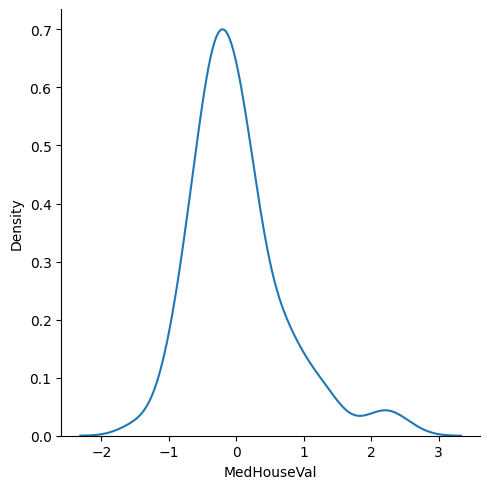

In [38]:
# Plot this residuals >> To see outliers

sns.displot(residuals, kind='kde')

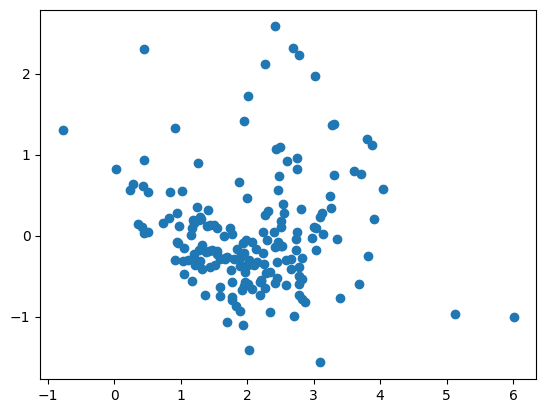

In [39]:
# Scatter plot wrt to prediction and residuals

plt.scatter(reg_pred, residuals)

In [40]:
# Performance metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

0.5149966364934953
0.49472303678289964
0.7033655072456281


**R square and adjusted R square**

Formula

**R^2 = 1- SSR/SST**

R^2 = coefficient of determination
SSR = Sum of square of residuals
SST = Sum of square of Total

Adjusted R2 = 1 - [(1-R2)*(n-1)(k-1)]

where:
R2 => The R2 of the model
n => The number of observations
k => The number of predictor variables


In [41]:
#  More performace metrics
#  R square and adjusted R square
# Adjusted R square will always be less than R2

from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)
# The more it is towrard one, the more better score we get



0.6221819557936538


In [42]:
# Display adjusted R-squared
# It is always be less than R-square

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1] - 1)

0.6045062578190878

**New Data Prediction**

In [46]:
whole_housing.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [43]:
# What happens here:

# iloc[0] → selects the first row (as a pandas Series).
# .values → converts it to NumPy array.
# .reshape(1, -1) → makes it a 2D row vector (1, 8).

row0 = whole_housing.data.iloc[0]
row0_reshaped = row0.values.reshape(1, -1)

In [45]:
row0_reshaped

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [48]:
# Transformation of new data

scaler.transform(row0.values.reshape(1, -1))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.08976654,  0.92654077,  0.70939674, -0.24246311, -1.00761685,
        -0.5373065 ,  1.12528556, -1.39009901]])

In [49]:
regression.predict(row0.values.reshape(1, -1))

array([96.71590875])

**Pickling the Model File for Deployment**

In [50]:
import pickle

In [52]:
pickle.dump(regression, open('regmodel.pkl', 'wb'))


In [54]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

In [56]:
# Prediction
pickled_model.predict(scaler.transform(row0.values.reshape(1, -1)))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([3.94406225])